<a href="https://colab.research.google.com/github/ahmedmoustafa/AUC-Fundamentals-of-Data-Science-II-Spring-2023/blob/main/examples/heights_weights/heights_weights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sex, Height, and Weight

In [91]:
# Import the required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot
import scipy.stats as stats

In [92]:
# Read the dataaset from the specified URL
df = pd.read_csv("https://raw.githubusercontent.com/ahmedmoustafa/AUC-Fundamentals-of-Data-Science-II-Spring-2023/main/examples/heights-and-weights/sex_height_weight.csv")
df.shape

(1000, 4)

In [93]:
df.head() # Display the the head of the dataset

,Name,Sex,Height,Weight
0,Jennifer Wolfe,Male,178.476999,88.993554
1,Tina Barber,Female,161.170414,67.397069
2,Dr. David Beasley Jr.,Female,165.886131,60.477043
3,Jake Lewis,Female,171.138179,54.824506
4,John Alvarez,Male,173.360926,81.982233


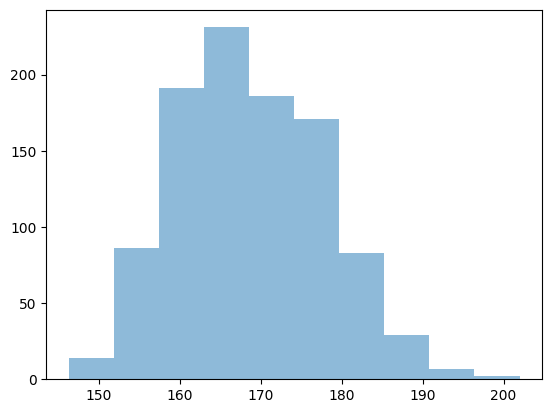

In [94]:
pyplot.hist(df['Height'], alpha=0.5) # Histogram for the population (males and females) heights
pyplot.show()

In [95]:
np.mean(df['Height']) # mean of the  population height (males and females, together)

168.6280909399918

In [96]:
df.groupby('Sex').size() # Group by Sex to find how many rows for each sex

Sex
Female    499
Male      501
dtype: int64

In [97]:
males_heights = df.loc[df['Sex'] == 'Male']['Height'] # Extract the height of the males
males_heights.head()

0     178.476999
4     173.360926
10    171.756076
12    176.693736
14    162.925575
Name: Height, dtype: float64

In [98]:
females_heights = df.loc[df['Sex'] == 'Female']['Height']  # Extract the height of the females
females_heights.head()

1    161.170414
2    165.886131
3    171.138179
5    160.595178
6    171.475277
Name: Height, dtype: float64

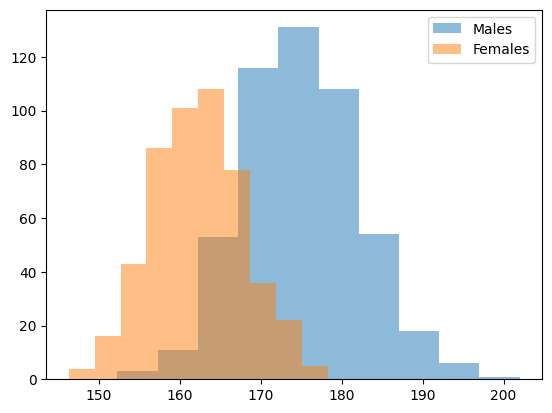

In [99]:
pyplot.hist(males_heights, alpha=0.5, label='Males') # Histogram for the males heights
pyplot.hist(females_heights, alpha=0.5, label='Females') # Histogram for the females heights
pyplot.legend(loc='upper right')
pyplot.show()

In [100]:
np.mean(males_heights) # the mean of the males heights

174.987405659491

In [101]:
np.mean(females_heights) # the mean of the females heights

162.24328798514392

## Statistical Significance in the difference between the heights according to the sex

In [102]:
stats.ttest_ind(a=males_heights, b=females_heights)

Ttest_indResult(statistic=31.339296972405272, pvalue=1.1687212633442504e-150)

The above t-test shows statistical significance p-value (1.16e-150 is much smaller than 0.05)

In [103]:
sample1 = males_heights.sample(n=10)
sample1

994    167.988660
714    174.736557
238    170.367495
443    174.376160
424    179.517632
971    170.232638
567    167.943396
118    182.999760
851    171.111660
285    161.335385
Name: Height, dtype: float64

In [104]:
np.mean(sample1)

172.06093426229694

In [105]:
sample2 = males_heights.sample(n=10)
sample2

603    184.489465
95     164.755395
640    172.649507
848    170.535820
127    171.035916
264    173.232023
431    160.725375
984    174.974782
734    182.204089
808    183.790293
Name: Height, dtype: float64

In [106]:
np.mean(sample2)

173.83926657452875

In [107]:
np.mean(sample1) - np.mean(sample2)

-1.7783323122318109

In [108]:
stats.ttest_ind(a=sample1, b=sample2)

Ttest_indResult(statistic=-0.5616651628870163, pvalue=0.5812709050496278)

In [109]:
diff = []
for i in range(10000):
    sample1 = males_heights.sample(n=10)
    sample2 = males_heights.sample(n=10)
    diff.append(np.mean(sample1) - np.mean(sample2))

np.mean(diff)

0.0019127293160168847

(array([  36.,  225.,  820., 1940., 2806., 2511., 1212.,  384.,   58.,
           8.]),
 array([-10.84276562,  -8.53357464,  -6.22438366,  -3.91519268,
         -1.6060017 ,   0.70318928,   3.01238026,   5.32157124,
          7.63076222,   9.9399532 ,  12.24914418]),
 <BarContainer object of 10 artists>)

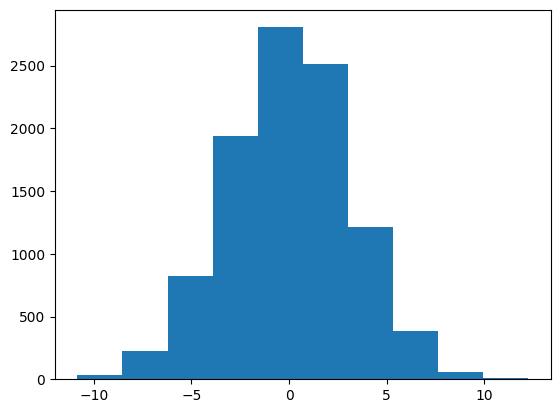

In [110]:
pyplot.hist(x=diff)

In [111]:
diff = []
for i in range(10000):
    sample1 = males_heights.sample(n=10)
    sample2 = females_heights.sample(n=10)
    diff.append(np.mean(sample1) - np.mean(sample2))

np.mean(diff)

12.763567316763224

(array([  18.,  121.,  597., 1605., 2690., 2675., 1618.,  560.,   93.,
          23.]),
 array([ 2.36564366,  4.4529139 ,  6.54018413,  8.62745436, 10.7147246 ,
        12.80199483, 14.88926506, 16.9765353 , 19.06380553, 21.15107576,
        23.23834599]),
 <BarContainer object of 10 artists>)

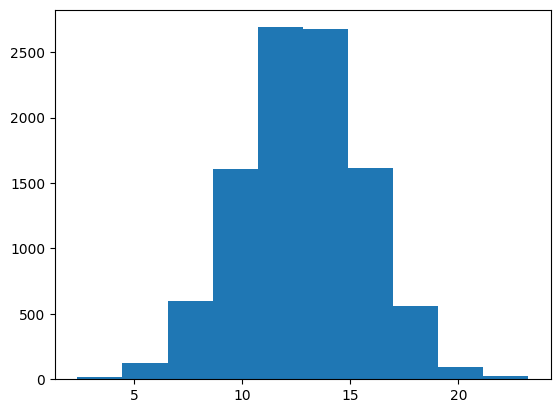

In [112]:
pyplot.hist(x=diff)